<a href="https://colab.research.google.com/github/PathakDeepak/TensorFlow_Practise/blob/main/section_3_neural_network_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural netwrok in TensorFlow

In [1]:
# Import TensoFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


### Creating data to view and fit

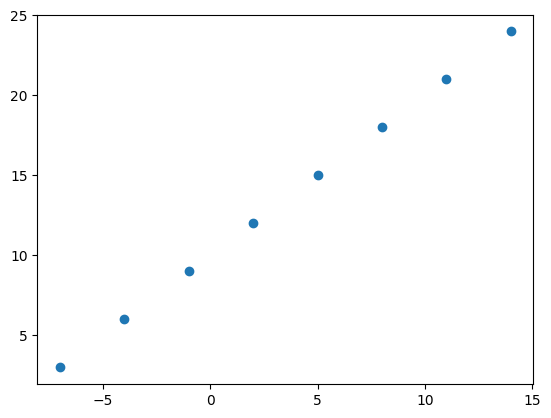

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

## Input and Output Shapes

In [3]:
# Create a ademo tensor for out housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
# Turn Numpy Array into Tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps with modelling in TensorFLow

- **Creating a model** - define the input and output layers, as well as the hidden layers of deep learning model.
- **Compiling a model** - define the loss function (in other words, the function which tells out model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluating metrics (what we can use to intercept the performance of our mmodel).
- **Fitting a model** - letting the model try to find patterns between X & Y (features and labels).

In [5]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for Mean Absolute Error
           optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.4021 - mae: 13.4021
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 13.2696 - mae: 13.2696
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 13.1371 - mae: 13.1371
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 13.0046 - mae: 13.0046
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 12.8721 - mae: 12.8721


In [6]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
# Try and make a prediction using our mmodel
input_data = np.array([17.0])
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


array([[3.500576]], dtype=float32)

## Improving a model

We can improve our model by altering the steps we took to create a model.

- **Creating a model** - Here we might add layers, increase the number of hidden untis (all called neurons) within each of the hidden layers, change activation function of each layer.
- **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
- **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [8]:
# Let's rebuild our model and optimize steps 1 at a time

# 1. Create model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step - loss: 9.1542 - mae: 9.1542
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 9.0217 - mae: 9.0217
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 8.8892 - mae: 8.8892
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 8.7567 - mae: 8.7567
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 8.6242 - mae: 8.6242
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 8.4917 - mae: 8.4917
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 8.3592 - mae: 8.3592
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 8.2267 - mae: 8.2267
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 8.0942 - mae: 8.0942
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 7.9617 - mae: 7.9617
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 7.8292 - mae: 7.8292
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 7.6967 - mae: 7.6967
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [9]:
# Let's see if out model prediction has improved...
input_data = np.array([17.0])
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[30.222994]], dtype=float32)

In [10]:
# This time add new optimizer to it

# 1. Create model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - loss: 20.7524 - mae: 20.7524
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 20.7517 - mae: 20.7517
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 20.7510 - mae: 20.7510
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 20.7504 - mae: 20.7504
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 20.7497 - mae: 20.7497
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 20.7490 - mae: 20.7490
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 20.7483 - mae: 20.7483
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 20.7477 - mae: 20.7477
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 20.7470 - mae: 20.7470
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 20.7463 - mae: 20.7463
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 20.7456 - mae: 20.7456
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 20.7450 - mae: 20.7450
Epoch 13/100
1/1 ━━━━━━━

In [11]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[-25.666433]], dtype=float32)

In [12]:
# This time add new optimizer to it, lets add extra hidden layer with 100 hidden units

# 1. Create model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              #optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              #optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.4701 - mae: 14.4701
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 13.5483 - mae: 13.5483
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 12.6516 - mae: 12.6516
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.7737 - mae: 11.7737
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 10.9202 - mae: 10.9202
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 10.2733 - mae: 10.2733
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 9.6272 - mae: 9.6272
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 8.9714 - mae: 8.9714
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 8.3062 - mae: 8.3062
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 7.6288 - mae: 7.6288
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 6.9397 - mae: 6.9397
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 6.2387 - mae: 6.2387
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━

In [13]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[27.097347]], dtype=float32)

## When it comes to evaluation...there are 3 words you should memorize

```Visualize, Visualize, Visualize```

It's good idea to Visualize:
- The data - what data are we working with? What does it look like?
- The model itself - what does our model look like?
- The training of a model - how does a model perform while it learns?
- The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [14]:
# make the bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labels for the dataset
Y = X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

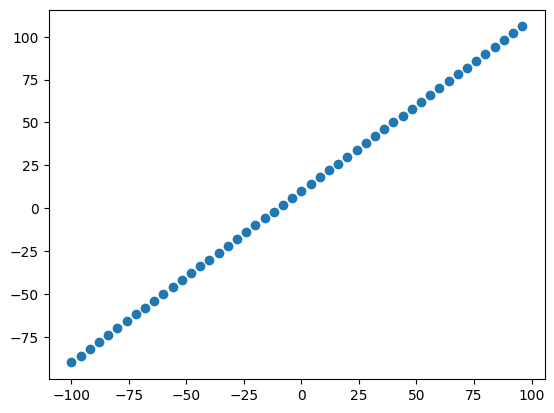

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### The 3 set...

* **Training set** - The model learns from this data, which is typically 70-80% of the total data you have available.
* **validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [17]:
# Check the length of how many samples we have
len(X)

50

In [18]:
# Split the data into train and test sets
X_train = X[:40] # first 4 are training samples (80% of data)
Y_train = Y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our data in training and test sets...let's visualize it again

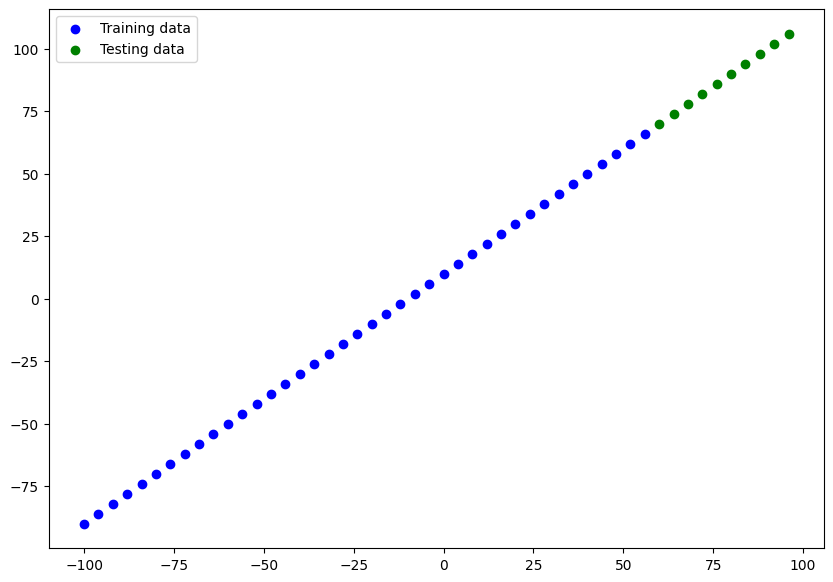

In [19]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# show a legent
plt.legend()

In [20]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output")
], name="one_of_many_models")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
## Visualize the model
model.summary()

Model: "one_of_many_models"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* Total params: total number of parameters in the model.
* Trainable parameters: these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters: these parameters aren't updated during training (this is ypical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [22]:
model.summary()

Model: "one_of_many_models"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

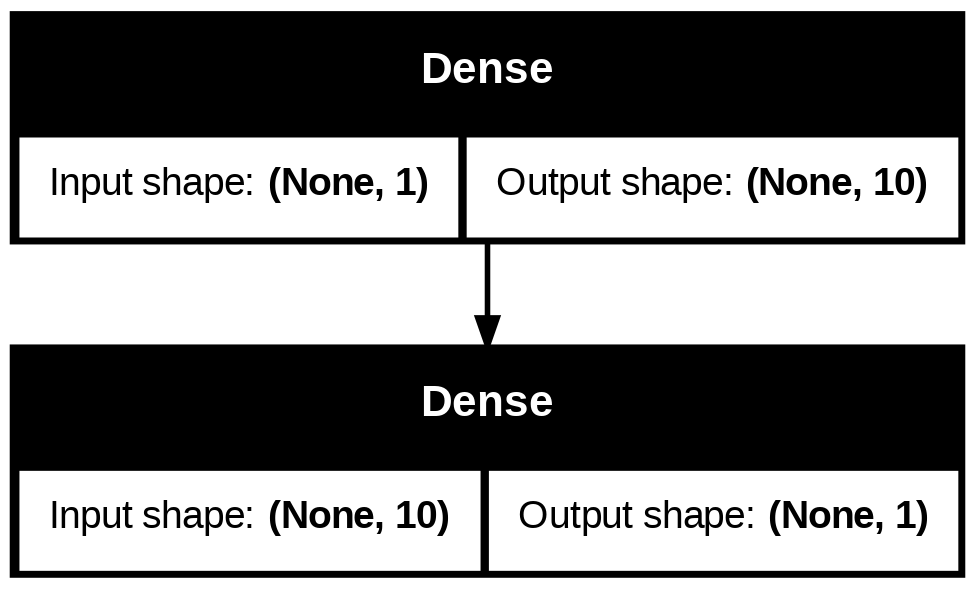

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# visualizing our model' predictions

To visualize predictions, it's a good idea to plot them against the ground trtuth labels.

Often you'll see in the form of `Y_test` versus `Y_pred` (ground truth versus your model's predictions).

In [24]:
# make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[37.174084],
       [39.546474],
       [41.918858],
       [44.29125 ],
       [46.663643],
       [49.036034],
       [51.408417],
       [53.780804],
       [56.153194],
       [58.52558 ]], dtype=float32)

In [25]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [26]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note**: If you feel like you're going to rescue some kind of functionality in the future, it's good idea to turn it into a function

In [27]:
# Let's create a plotting functions
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_label=Y_test,
                    predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Prediction data")
  # show legend
  plt.legend()

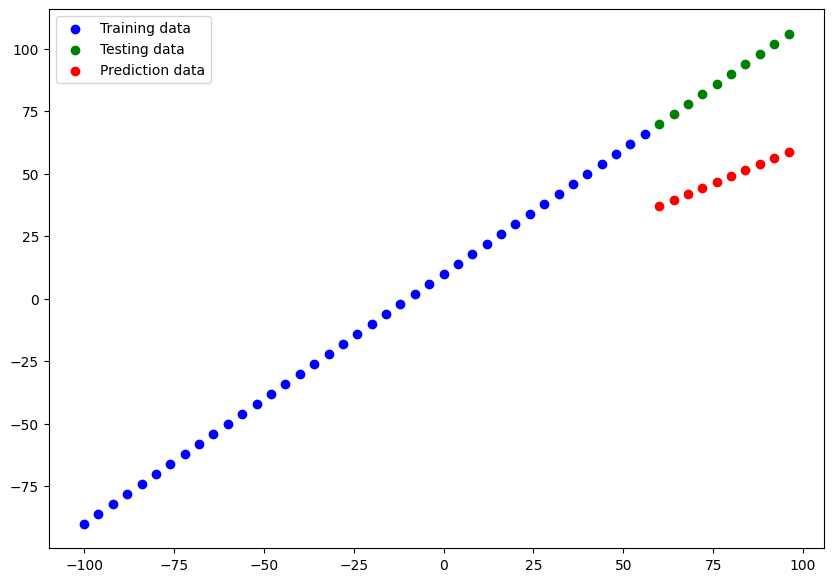

In [28]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_label=Y_test, predictions=Y_pred)

Lets optimize our model

In [29]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, name="output")
], name="model_2")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Try some predictions
Y_pred = model.predict(X_test)
Y_pred , Y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


(array([[ 72.663216],
        [ 76.82236 ],
        [ 80.98149 ],
        [ 85.14063 ],
        [ 89.29978 ],
        [ 93.45893 ],
        [ 97.61811 ],
        [101.77728 ],
        [105.9362  ],
        [110.094536]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

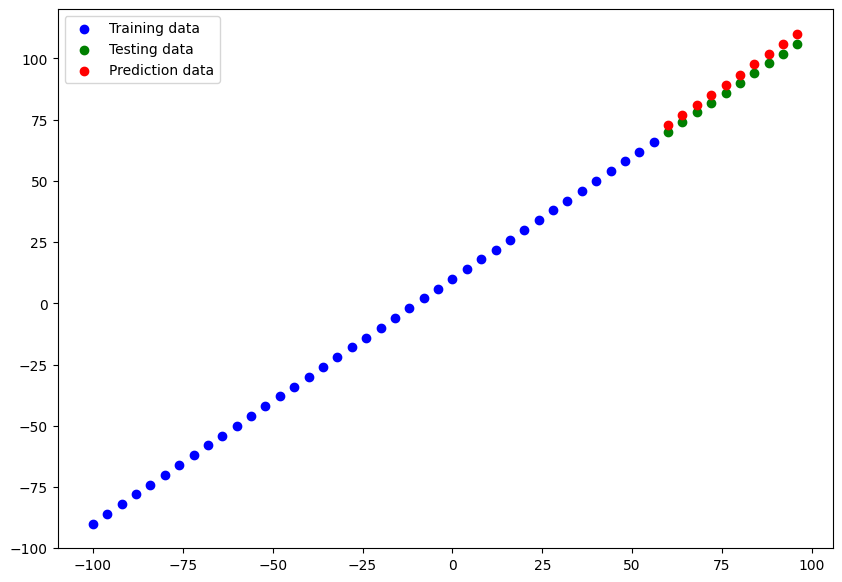

In [31]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_label=Y_test, predictions=Y_pred)

### Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

- **Mean absolute error (MAE)** - the mean difference between each of the predictions.
- **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [32]:
# Evaluate the model on test set
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 3.3793 - mae: 3.3793


[3.379254102706909, 3.379254102706909]

In [33]:
# calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(Y_test, Y_pred).numpy()
mae

np.float32(3.379254)

In [34]:
Y_pred.shape

(10, 1)

In [35]:
Y_test.shape

TensorShape([10])

In [36]:
tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.663216,  76.82236 ,  80.98149 ,  85.14063 ,  89.29978 ,
        93.45893 ,  97.61811 , 101.77728 , 105.9362  , 110.094536],
      dtype=float32)>

In [37]:
Y_pred.shape

(10, 1)

In [38]:
# calculate the mean squared error
mae = tf.keras.metrics.MeanSquaredError()(Y_test, Y_pred).numpy()
mae

np.float32(11.628156)

In [39]:
# Make some functions to reuse MAE and MSE
def mae(Y_true, Y_pred):
  return tf.keras.metrics.MeanAbsoluteError()(Y_true, Y_pred).numpy()

def mse(Y_true, Y_pred):
  return tf.keras.metrics.MeanSquaredError()(Y_true, Y_pred).numpy()

### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. ``Get more data`` - get more examples for your model to train on (more opportunities to learn patterns).
2. ``Make your model larger (use a more complex model)`` - this might come in the form of more layers or more hidden units in each layer.
3. ``Train for longer`` - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. ``model_1`` - same as original model, 1 layer, trained for 100 epochs.
2. ``model_2`` - 2 layers, trained for 100 epochs.
3. ``model_3`` - 2 layers, trained for 500 epochs.

**``Build model_1``**

In [40]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model_1
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


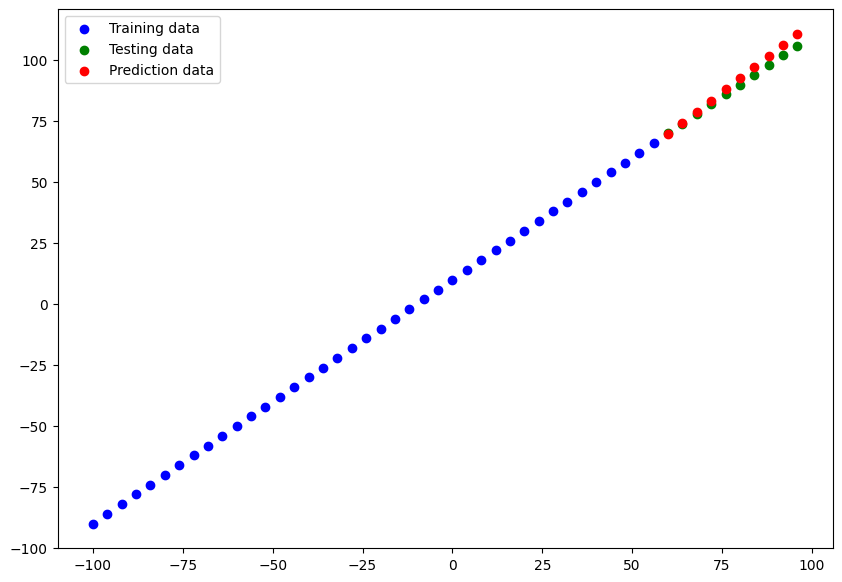

In [41]:
# Make and plot for prediction model_1
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [42]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(np.float32(2.3438575), np.float32(7.8688607))

**``Build model_2``**
* 2 dense layer, trained for 100 epochs

In [43]:
# Lets build model 2
# set random seed
tf.random.set_seed(42)

# 1. make the model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


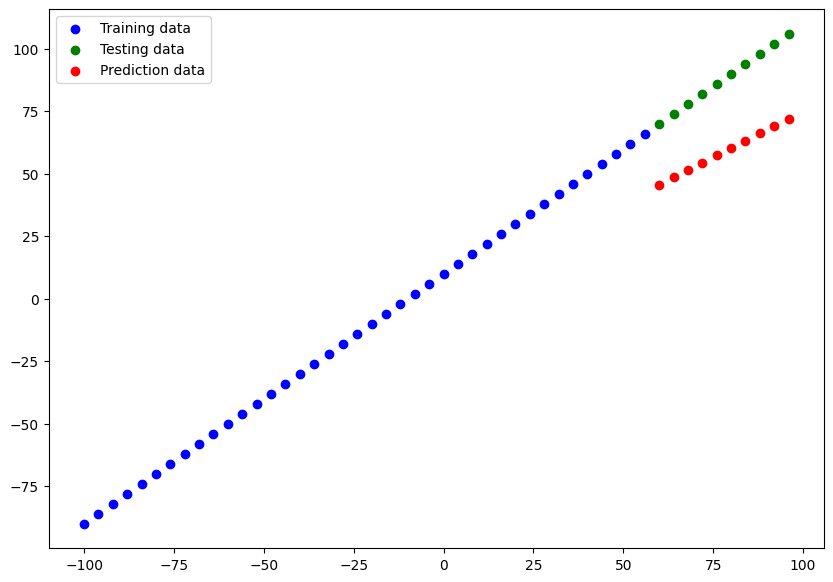

In [44]:
# Make and plot for prediction model_2
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [45]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(np.float32(29.111927), np.float32(856.8797))

**``Build model_3``**

* 2 layers, trained for 500 epochs

In [46]:
# let's build model_3

#set random seed
tf.random.set_seed(42)

# 1. make the model_3
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])
# 3. fit he model
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500, verbose=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


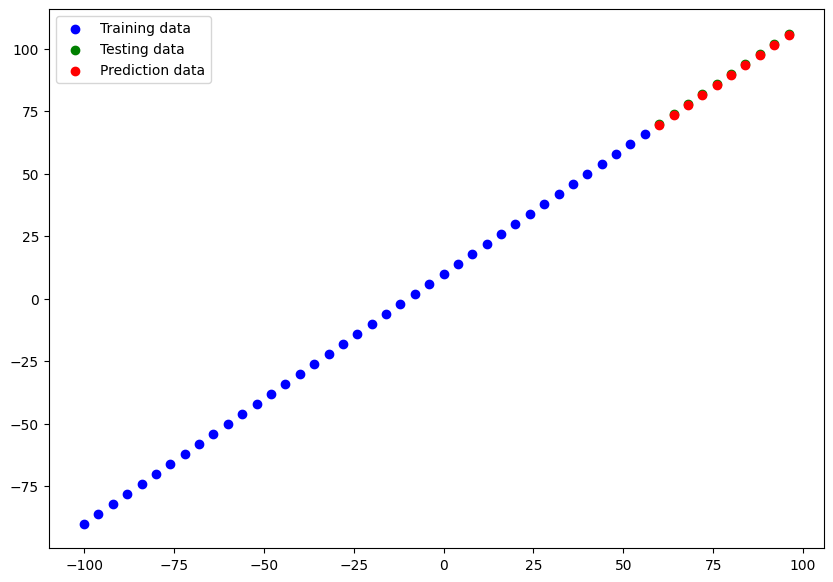

In [47]:
# Make and plot for prediction model_3
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [48]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(np.float32(0.46549225), np.float32(0.2213532))

In [49]:
model_3.predict(np.array([1000.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1004.0505]], dtype=float32)

# Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [50]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,2.343858,7.868861
1,model_2,29.111927,856.879700
2,model_3,0.465492,0.221353


## Saving our models

Saving our models allows us to use them outside of Google colab.

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using *model.save()*.

There are two ways to save a model in TensorFlow:

1. The [SavedModel](https://colab.research.google.com/drive/1TKJBat09F1lUpbs14mgBsm1iLG__GuNR#scrollTo=xRUFVS0WBtmd&line=11&uniqifier=1) format (default).
2. The [HDF5](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format) format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

🔑 **Note**: Based on format there are different ways to save models

1. Recommended (new Keras format):
```
model.save("ten_increment_suggestion_model.keras")
```
  Use .keras → safest for reloading with modern Keras.

2. HDF5 format (legacy, still supported):
```
model.save("ten_increment_suggestion_model.h5")
```
Use .h5 → if you need compatibility with older code.

3. If you want a TensorFlow SavedModel (for TFLite, TF Serving, etc.):
```
model.export("ten_increment_suggestion_model")
```
Use .export() → if you plan to deploy with TensorFlow ecosystem (TF Serving, TFLite).



In [51]:
# save model using keras (default and best)
model_3.save("ten_increment_suggestion_model.keras")

In [52]:
# save model using SavedModel
model_3.export("ten_increment_SavedModel")

Saved artifact at 'ten_increment_SavedModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_21')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138472288666832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138472288668176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138472288667216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138472288667408: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [53]:
# save model using HDF5
model_3.save("ten_increment_suggestion_model.h5")

## Loading a saved model

In [54]:
# Load in the SavedModel format model
load_saved_model_format = tf.saved_model.load("/content/ten_increment_SavedModel")
print(load_saved_model_format)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7df097de28d0>


In [55]:
# Load keras model format
load_keras_model = tf.keras.models.load_model("/content/ten_increment_suggestion_model.keras")
load_keras_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [56]:
load_keras_model.predict(np.array([1000]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1004.0505]], dtype=float32)

### A larger example

Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, ``age``, ``sex``, ``bmi``, ``children``, ``smoking_status`` and ``residential_region``.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

🔑 **Note**: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [57]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [59]:
# check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the ``sex``, ``smoker`` and ``region`` columns) into numerical variables using one-hot encoding.

In [60]:
# Let's try one-hot encoding for DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=np.int64)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [61]:
# Create X & Y values (features & labels)
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]

In [62]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [63]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [64]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [65]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(1070, 1070, 268, 268)

In [66]:
# Build a nueral network
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    #tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                        metrics=["mae"])

# 3. fit the model
history = insurance_model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=200, verbose=0)

In [67]:
# check the result of insurance_model on test data
insurance_model.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8867.6768 - mae: 8867.6768  


[8676.80078125, 8676.80078125]

Text(0, 0.5, 'epochs')

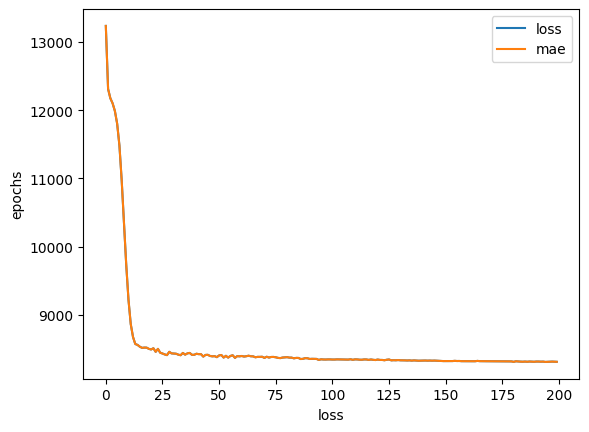

In [68]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

> 🤔 **Question**: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before.. so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing Data (normalization and standardization)

In terms of scaling values, neurla network tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better

<Axes: ylabel='Frequency'>

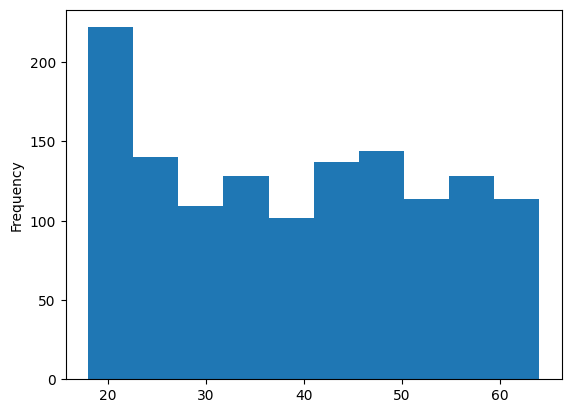

In [69]:
X["age"].plot(kind='hist')

<Axes: ylabel='Frequency'>

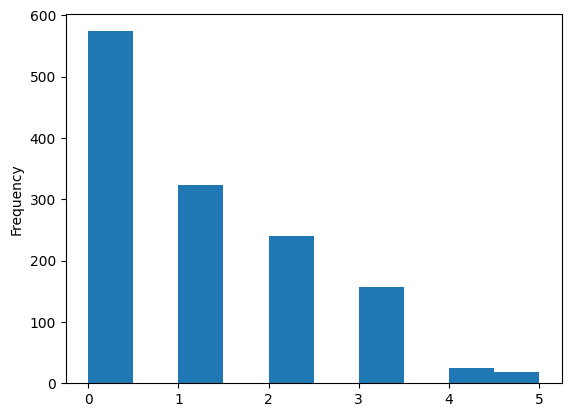

In [70]:
X["children"].plot(kind="hist")

<font color="yellow">A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.</font>

This practice is called ``normalization`` (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call ``standardization`` which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [Feature Scaling](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)
 * * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling
 * * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
 * * Which one should you use?
 * * * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

We have already turned our data into numbers using ``get_dummies()``, let's see how we'd normalize it as well

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [72]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [73]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

* [make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
* * [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
* * [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

In [74]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 & 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# create X & Y
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

# Build our train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [75]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [76]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [77]:
X_train_normal.shape

(1070, 11)

In [78]:
# Build a neural network model to fit on our normallized data

tf.random.set_seed(42)

# 1. create a model
insurance_model_normalize = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_normalize.compile(loss=tf.keras.losses.mae,
                                  optimizer=tf.keras.optimizers.Adam(),
                                  metrics=["mae"])

# 3. fit the model
insurance_model_normalize.fit(tf.expand_dims(X_train_normal, axis=-1), Y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13298.1865 - mae: 13298.1865
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13296.2334 - mae: 13296.2334
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13291.5586 - mae: 13291.5586
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13281.3623 - mae: 13281.3623
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13262.5469 - mae: 13262.5469
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13232.0273 - mae: 13232.0273
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13186.9102 - mae: 13186.9102
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13124.4219 - mae: 13124.4219
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13041.8613 - mae: 13041.8613
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12936.6025 - mae: 12936.6025
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12806.1074 - mae: 12806.1074
Epoch 12/200
34/34 ━━━━━━━━━━━

In [79]:
insurance_model_normalize.evaluate(X_test_normal, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8777.2129 - mae: 8777.2129  


[8627.7666015625, 8627.7666015625]